# Banglore House Price Prediction 

# Step 1 DATA CLEANING

In [19]:
import pandas as pd
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [21]:
df.shape

(13320, 9)

In [23]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [25]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [27]:
# dropping unnecessary coloumn

df1=df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [29]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [33]:
df2=df1.dropna() # to drop all the null values 

In [35]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [37]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [39]:
df2['BHK']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2536\1413930896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [41]:
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [43]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [45]:
df2[df2['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [47]:
df2['total_sqft'].unique()  # it has number in this foramt 1133 - 1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [49]:
def isfoat(x):
    try:
        float(x)
    except:
        return False
    return True

In [51]:
df2[~df2['total_sqft'].apply(isfoat)].head(10) # ~ is a nigget operation it means reverse 

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [53]:
# coverting the total_sqft number like this to avg -[2100 - 2850]
def convert_sqr_num_to_avg(x):
    token=x.split('-')
    if len(token)==2:
        return(float(token[0])+float (token[1]))/2
    try:
        return float(x)
    except:
        return None


In [55]:
convert_sqr_num_to_avg('1000 - 500')

750.0

In [57]:
df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqr_num_to_avg)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [59]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [61]:
df3.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

# Step 2 Feature Engineering 


In [ ]:
# # Creating new features or modifying existing ones to improve model 
# # performance (e.g., encoding, scaling, interaction terms).

# Technique	                      Description
# Imputation	Filling missing values (e.g., with mean, median, mode)
# Encoding	Converting categorical data to numeric (e.g., One-Hot, Label Encoding)
# Scaling/Normalization	Making features comparable (e.g., MinMaxScaler, StandardScaler)
# Binning	Grouping numerical values into discrete intervals
# Interaction Features	Creating features by combining two or more features
    
# Use StandardScaler (Scaling) when your features are normally distributed.

# Use MinMaxScaler (Normalization) when you need bounded inputs.

In [63]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [65]:
# Creating a new column Price_Per_Sqft =price/total_sqft

df4=df3.copy()
df4['Price_Per_Sqft']=df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [67]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [69]:
# Total unique Location 
len(df['location'].unique())

1306

In [71]:
# remove extra space from location and grouping all the location
df4.location=df4.location.apply(lambda x:x.strip())
grploc=df4.groupby('location')['location'].count().sort_values(ascending=False)
grploc

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [73]:
# All the Locations who has count less than 10 
len(grploc[grploc <=10])

1052

In [75]:
location_less_than_10=grploc[grploc <=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [77]:
# All the location <10 are named as other
df4.location=df4.location.apply(lambda x:'Other' if x in location_less_than_10 else x)
len(df4.location.unique()) # unique location >10

242

# Step 3 Outlier Detection Using threshold

In [204]:
df4.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [79]:
df4[df4.total_sqft/df4.BHK<300]

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [ ]:
# 6 Bedroom	total_sqft- 1020.0 which dont make any sence so removing all the outliers 
# using nigget function 

In [81]:
df5=df4[~(df4.total_sqft/df4.BHK<300)]
df5.shape

(12502, 7)

In [83]:
df5.Price_Per_Sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_Per_Sqft, dtype: float64

In [ ]:
# filtering out the value of Price_Per_Sqft which is between mean and 1 std PER LOCATION because 
# some Location has high price while some has Low

In [87]:
import numpy as np
def remove_outliers(df): # taking dataframe as input
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_Per_Sqft)
        st=np.mean(subdf.Price_Per_Sqft)
        reduced_df=subdf[(subdf.Price_Per_Sqft>(m-st)) & (subdf.Price_Per_Sqft<=(m+st)) ]
    # anything above mean-std and anything belove mean + std ke niche  
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
    

In [89]:
df6=remove_outliers(df5)
df6.shape

(12027, 7)

In [91]:
df5.shape

(12502, 7)

In [ ]:
# now checking outlier for property price for 2 bedroom apt are more than 3 bedroom apt

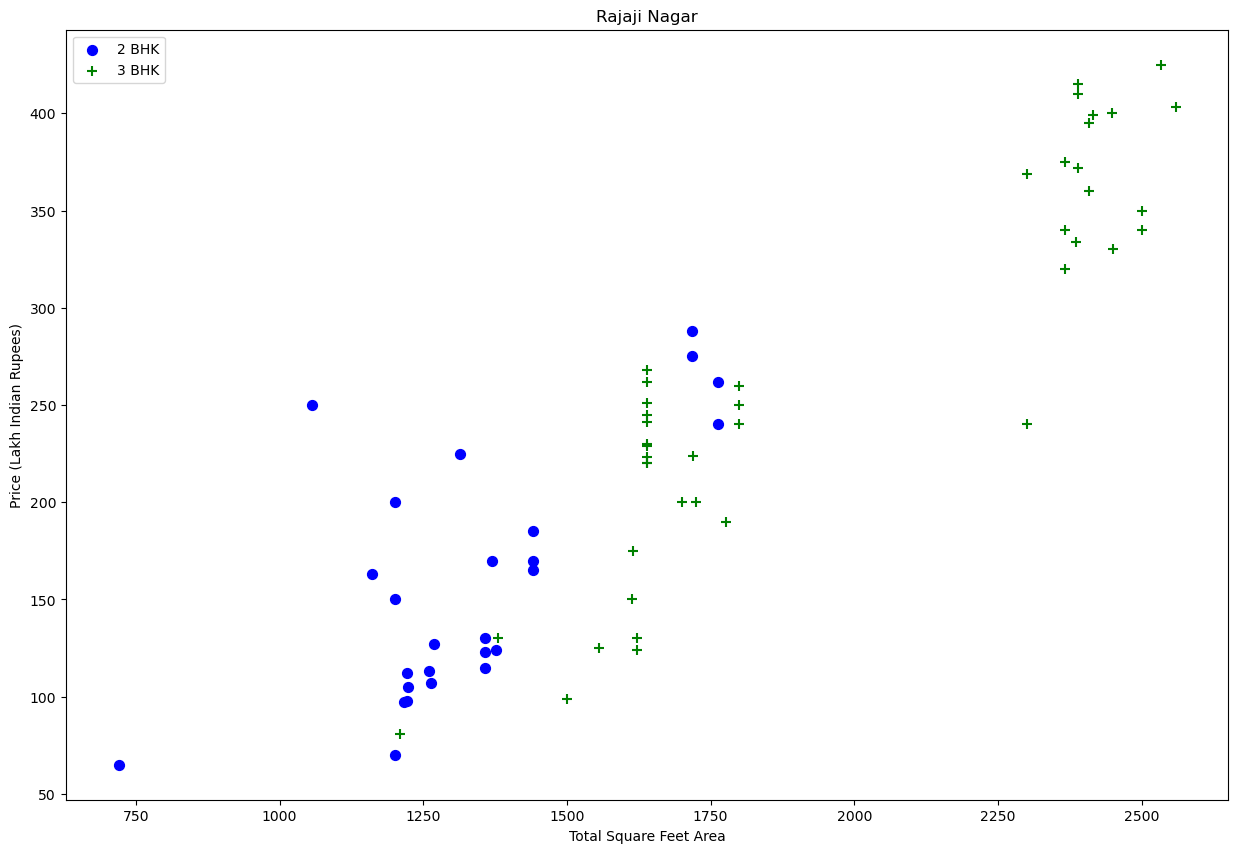

In [93]:
import matplotlib.pyplot as plt
import matplotlib

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

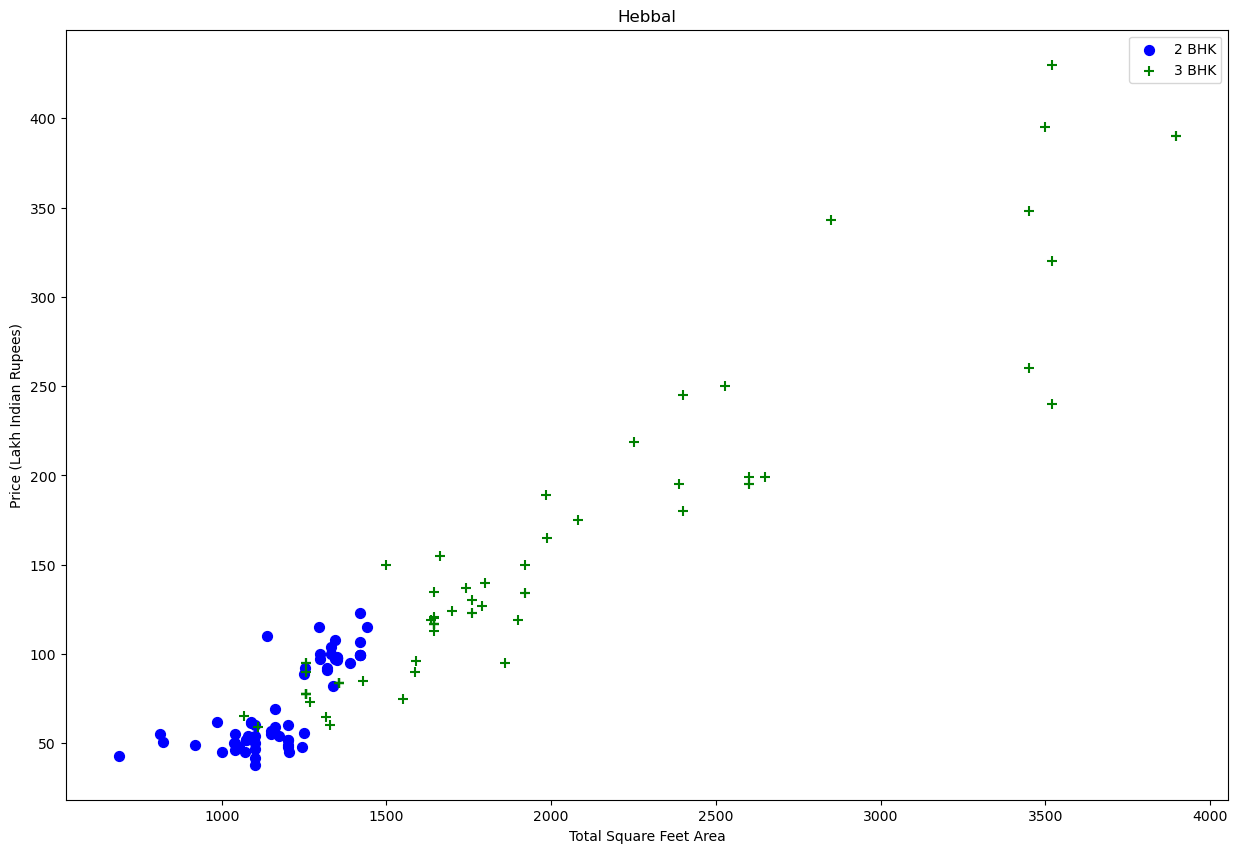

In [257]:
plot_scatter_chart(df6,"Hebbal")

In [94]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_Sqft),
                'std': np.std(bhk_df.Price_Per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(8623, 7)

In [97]:
df7.head()

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,4 Bedroom,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000


Text(0, 0.5, 'Count')

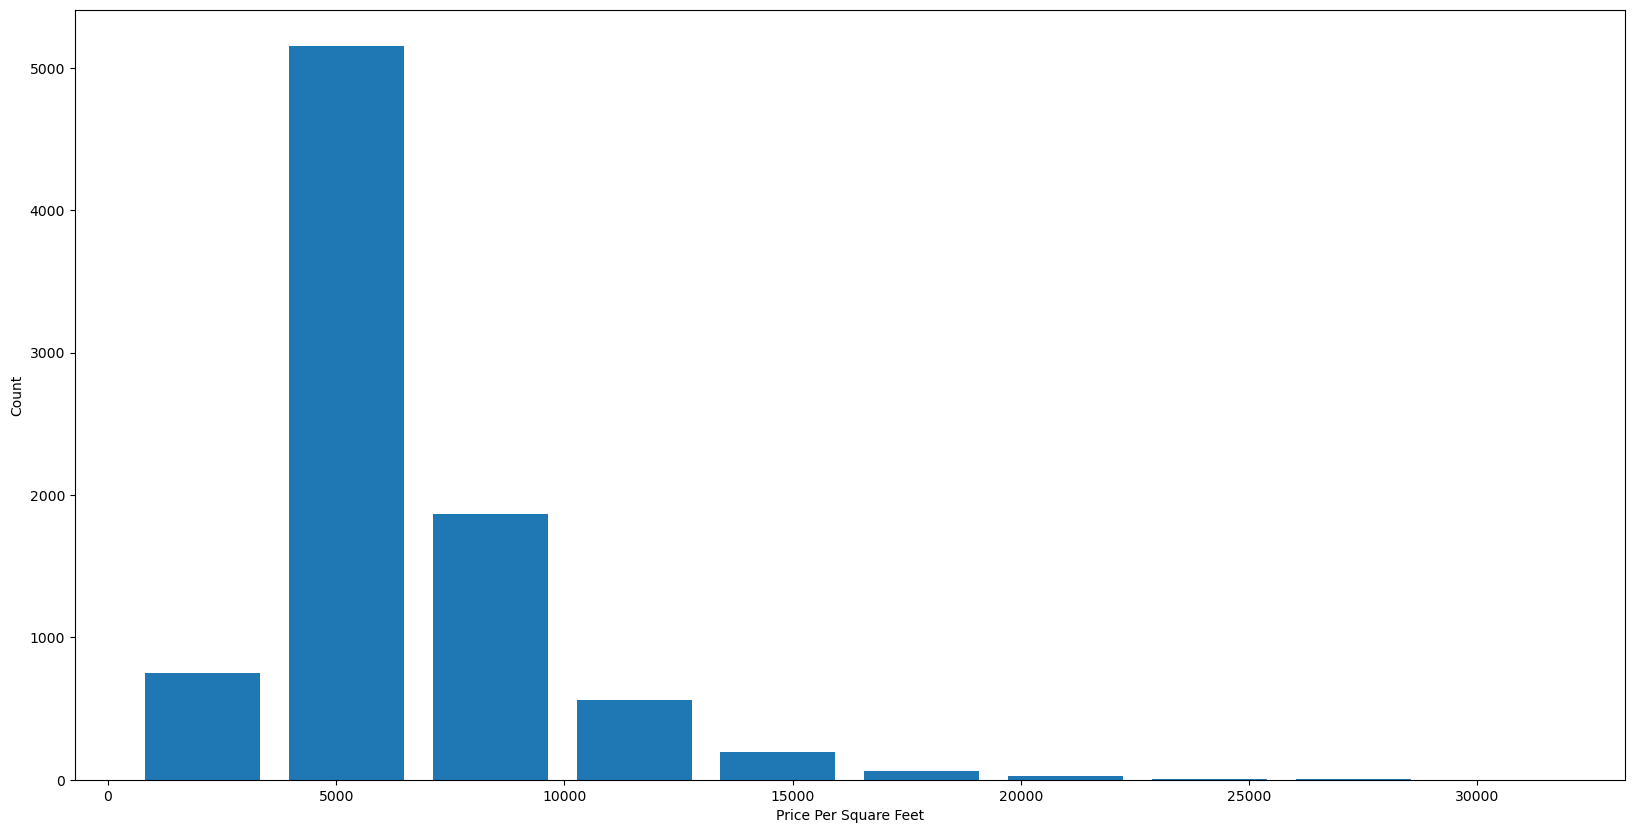

In [425]:

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_Per_Sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
# Outlier Removal Using Bathrooms Feature

In [99]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  7.,  1.,  8.,  6.,  9., 10., 12., 16., 13.])

In [101]:
df7[df7.bath>10]


,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
6457,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
7144,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7233,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7976,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8316,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [103]:
df7[df7.bath>df7.BHK+2]

,location,size,total_sqft,bath,price,BHK,Price_Per_Sqft
1945,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6404,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7068,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9375,Rajaji Nagar,5 BHK,7500.0,8.0,1700.0,5,22666.666667
10619,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [105]:
df7.shape

(8623, 7)

In [109]:

df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(8517, 7)

In [ ]:
# now taking a important columns for one hot encoding before model trainng 

In [111]:
df9=df8.drop(['size','Price_Per_Sqft'],axis='columns')
df9.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


# Use One Hot Encoding For Location


In [113]:
dummies=pd.get_dummies(df8.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# merging our origial dataframe and dummie variable 

In [115]:
df10 = pd.concat([df9,dummies.drop('Other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2400.0,4.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1000.0,3.0,60.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
df11=df10.drop('location',axis='columns')
df11.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,450.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Building a model 

In [119]:
df11.shape

(8517, 245)

In [121]:
x=df11.drop(['price'],axis='columns')

In [123]:
y=df11.price

In [125]:
len(y)

8517

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [129]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5177109360777501

In [153]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6563189059917292

In [ ]:
# Using K Fold cross validation to measure accuracy of our LinearRegression model

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.52177293, 0.79689536, 0.80311491, 0.791701  , 0.56569427])

In [133]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False],
                'regressor__positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
find_best_model_using_gridsearchcv(x, y)


,model,best_score,best_params
0,linear_regression,0.695836,"{'regressor__fit_intercept': True, 'regressor_..."
1,lasso,0.591926,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.764747,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [141]:
def predict_price(location, sqft, bath, bhk):
    x_input = np.zeros(len(data_columns))
    x_input[0] = sqft
    x_input[1] = bath
    x_input[2] = bhk
    if location in data_columns:
        loc_index = np.where(data_columns == location)[0][0]
        x_input[loc_index] = 1
    return model.predict([x_input])[0]


In [517]:
predict_price('1st Block Jayanagar',1630, 3, 3)


230.5342172787531

# Exporting our Model

In [168]:
import pickle
with open('House_Price_Predictions.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
# Dumping all our columns name in json file

In [174]:
import json
columns={
    'data_columns' : [col.lower() for col in x.columns] # X.columns is my column data and it is coverting to lower case
}
# Dumping labels to json file 

with open ("Columns.json",'w')as f:
    f.write(json.dumps(columns))